In [52]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

'''This cell contains the webscraping code to create the data frame of data from the 2020-2021 NBA season
'''

url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("GameScope", ""),
("GameSegment", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"), 
("Season", "2020-21"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),    
("TeamID", "0"),   
("TwoWay", "0"),    
("VsConference", ""),
("VsDivision", "" ))

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"connection": "keep-alive",
"host" : "stats.nba.com",
"If-Modified-Since": "Sat, 27 Nov 2021 23:37:38 GMT"  ,
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-ch-ua-platform": "macOS" ,
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
NBA_20_21 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
NBA_20_21.columns = response_json['resultSets'][0]['headers']
NBA_20_21.head(3)


,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,72,41,31,0.569,48.3,40.8,87.2,0.468,...,9,24,17,17,18,9,13,9,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,36,36,0.500,48.3,41.5,88.9,0.466,...,16,13,6,11,24,13,16,13,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,48,24,0.667,48.3,43.1,87.3,0.494,...,13,27,7,9,13,18,2,7,10,Brooklyn Nets


In [53]:
'''This cell contains the webscraping code to create the data frame of data from the 2019-2020 NBA season
'''

url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("GameScope", ""),
("GameSegment", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"), 
("Season", "2019-20"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),    
("TeamID", "0"),   
("TwoWay", "0"),    
("VsConference", ""),
("VsDivision", "" ))

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"connection": "keep-alive",
"host" : "stats.nba.com",
"If-Modified-Since": "Sat, 27 Nov 2021 23:37:38 GMT"  ,
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-ch-ua-platform": "macOS" ,
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
NBA_19_20 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
NBA_19_20.columns = response_json['resultSets'][0]['headers']
NBA_19_20.head(3)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,67,20,47,0.299,48.6,40.6,90.6,0.449,...,28,13,12,30,30,13,17,29,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,48,24,0.667,48.4,41.3,89.6,0.461,...,8,6,5,25,20,15,9,3,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,35,37,0.486,48.6,40.4,90.3,0.448,...,24,27,23,21,16,10,16,15,10,Brooklyn Nets


In [54]:
'''This cell contains the webscraping code to create the data frame of the current data from the 2021-2022 NBA season
'''


url = 'https://stats.nba.com/stats/leaguedashteamstats'

params =(
("Conference", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("GameScope", ""),
("GameSegment", ""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"), 
("Season", "2021-22"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),    
("TeamID", "0"),   
("TwoWay", "0"),    
("VsConference", ""),
("VsDivision", "" ))

header = {
"accept": "application/json, text/plain, */*",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-US,en;q=0.9",
"connection": "keep-alive",
"host" : "stats.nba.com",
"If-Modified-Since": "Sat, 27 Nov 2021 23:37:38 GMT"  ,
"origin": "https://www.nba.com",
"referer": "https://www.nba.com/",
"sec-ch-ua-platform": "macOS" ,
"sec-fetch-dest": "empty",
"sec-fetch-mode": "cors",
"sec-fetch-site": "same-site",
"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


response = requests.get(url, headers=header, params=params)
response_json = response.json()
NBA_21_22 = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
NBA_21_22.columns = response_json['resultSets'][0]['headers']
NBA_21_22.head(3)


,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,25,13,12,0.52,48.0,41.4,89.0,0.465,...,1,29,24,9,4,14,7,9,10,Atlanta Hawks
1,1610612738,Boston Celtics,26,13,13,0.50,49.2,39.4,88.7,0.444,...,13,15,7,11,12,4,12,11,10,Boston Celtics
2,1610612751,Brooklyn Nets,25,17,8,0.68,48.0,39.8,85.8,0.464,...,12,27,11,19,19,7,10,6,10,Brooklyn Nets


In [55]:
'''This chunk of code combines the the 19-20 and 20-21 season into one larger data frame called NBA_predictors. This
is the data we will use the regression to create our function'''
years = [NBA_19_20,NBA_20_21]
NBA_predictors = pd.concat(years)
NBA_predictors.head(3)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,67,20,47,0.299,48.6,40.6,90.6,0.449,...,28,13,12,30,30,13,17,29,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,48,24,0.667,48.4,41.3,89.6,0.461,...,8,6,5,25,20,15,9,3,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,35,37,0.486,48.6,40.4,90.3,0.448,...,24,27,23,21,16,10,16,15,10,Brooklyn Nets


In [56]:
'''This chunk of code takes the already created NBA_predictors data frame and removes some of the columns that are not 
relevant to our project in order to make the data easier to work with.'''

NBA_predictors = NBA_predictors.drop(['CFPARAMS', 'CFID','TEAM_ID','GP','W','L','TEAM_NAME', 'GP_RANK','W_RANK','L_RANK','W_PCT_RANK','MIN_RANK','FGM_RANK',
'FGA_RANK','FG_PCT_RANK','FG3M_RANK','FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
'DREB_RANK','REB_RANK','AST_RANK','TOV_RANK','STL_RANK','BLK_RANK','BLKA_RANK','PF_RANK','PFD_RANK','PTS_RANK',
'PLUS_MINUS_RANK'], axis = 1)

In [57]:
NBA_predictors.head()

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,0.299,48.6,40.6,90.6,0.449,12.0,36.1,0.333,18.5,23.4,...,43.3,24.0,16.2,7.8,5.1,6.4,23.1,21.0,111.8,-8.0
1,0.667,48.4,41.3,89.6,0.461,12.6,34.5,0.364,18.6,23.2,...,46.1,23.0,13.8,8.3,5.6,5.5,21.6,20.7,113.7,6.3
2,0.486,48.6,40.4,90.3,0.448,13.1,38.1,0.343,17.9,24.1,...,47.9,24.5,15.3,6.4,4.5,5.3,21.0,21.1,111.8,-0.6
3,0.354,48.5,37.3,85.9,0.434,12.1,34.3,0.352,16.2,21.6,...,42.8,23.8,14.6,6.6,4.1,5.0,18.8,20.6,102.9,-6.8
4,0.338,48.2,39.6,88.6,0.447,12.2,35.1,0.348,15.5,20.5,...,41.9,23.2,15.5,10.0,4.1,5.9,21.8,19.2,106.8,-3.1


In [58]:
'''This cell prints out the correlations between all the variables in the columns. We used this just to get an 
initial look at the variables that had the highest correlation with win percentage and points scored.'''
NBA_predictors.corr()

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
W_PCT,1.000000,-0.064166,0.520923,-0.079686,0.688760,0.347074,0.138917,0.604490,0.182128,0.038758,...,0.425169,0.166070,-0.307449,-0.064896,0.248867,-0.633893,-0.044527,0.087098,0.611080,0.951341
MIN,-0.064166,1.000000,-0.023804,-0.027275,-0.012542,-0.257688,-0.200986,-0.191260,0.113934,0.132098,...,-0.044758,0.113513,0.108587,-0.026111,-0.040404,0.108713,0.110345,0.189439,-0.076122,-0.069333
FGM,0.520923,-0.023804,1.000000,0.561902,0.803084,0.137157,-0.012225,0.402920,0.009315,-0.051866,...,0.381611,0.468978,-0.249962,0.015244,0.265181,-0.299296,0.019283,-0.068647,0.831754,0.562281
FGA,-0.079686,-0.027275,0.561902,1.000000,-0.040603,0.098910,0.186639,-0.156364,0.077328,0.102756,...,0.393157,0.103049,-0.132382,0.172068,0.319291,0.194606,0.219443,-0.017013,0.506531,-0.012521
FG_PCT,0.688760,-0.012542,0.803084,-0.040603,1.000000,0.091246,-0.151612,0.597339,-0.035972,-0.129496,...,0.174439,0.497773,-0.200347,-0.094448,0.099235,-0.497226,-0.123952,-0.062976,0.642154,0.688847
FG3M,0.347074,-0.257688,0.137157,0.098910,0.091246,1.000000,0.926988,0.513031,0.020600,-0.109172,...,0.152105,-0.041954,-0.092102,-0.140280,0.043015,-0.262344,0.020987,-0.143175,0.509872,0.436103
FG3A,0.138917,-0.200986,-0.012225,0.186639,-0.151612,0.926988,1.000000,0.156764,0.066005,0.012316,...,0.129765,-0.091718,0.066658,-0.040823,0.059757,-0.108527,0.082650,-0.032957,0.384240,0.221352
FG3_PCT,0.604490,-0.191260,0.402920,-0.156364,0.597339,0.513031,0.156764,1.000000,-0.070932,-0.296443,...,0.092887,0.102618,-0.394140,-0.255286,-0.001666,-0.443164,-0.102089,-0.288776,0.484818,0.651395
FTM,0.182128,0.113934,0.009315,0.077328,-0.035972,0.020600,0.066005,-0.070932,1.000000,0.902357,...,0.210093,-0.138278,-0.005230,0.071716,0.229755,-0.006550,0.377739,0.758679,0.400384,0.214239
FTA,0.038758,0.132098,-0.051866,0.102756,-0.129496,-0.109172,0.012316,-0.296443,0.902357,1.000000,...,0.317934,-0.154290,0.218117,0.114332,0.261165,0.080916,0.354548,0.817662,0.264469,0.065968


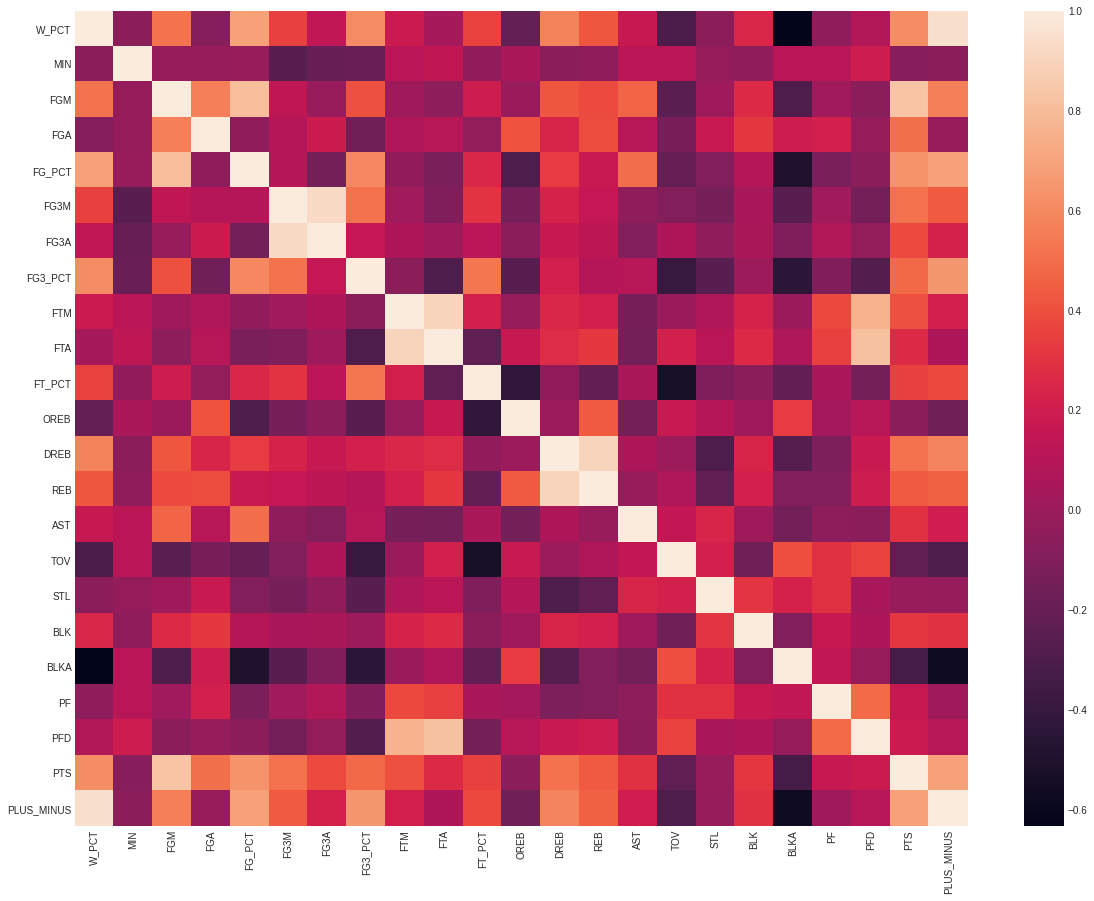

In [59]:
import seaborn as sbs
import matplotlib.pyplot as plt
'''This cell takes the correlations from the cell above and turns it into a heatmap. This is a vizualization we used
in our presentation and is a little bit easier to understand than all the numbers in the cell above.'''

plt.subplots(figsize=(20,15))
sbs.heatmap(NBA_predictors.corr());

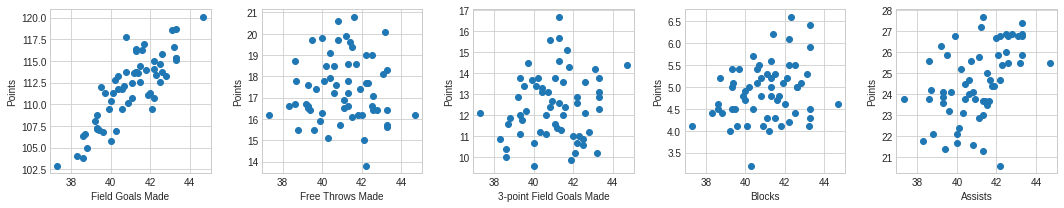

In [60]:
'''This code chunk takes 5 of the statistics with the highest correlation to Points and gives a more simplified visual
of these statistics compared to Points'''
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plt.scatter(NBA_predictors['FGM'], NBA_predictors['PTS'])
plt.xlabel('Field Goals Made')
plt.ylabel('Points')
plt.subplot(1,5,2)
plt.scatter(NBA_predictors['FGM'], NBA_predictors['FTM'])
plt.xlabel('Free Throws Made')
plt.ylabel('Points')
plt.subplot(1,5,3)
plt.scatter(NBA_predictors['FGM'], NBA_predictors['FG3M'])
plt.xlabel('3-point Field Goals Made')
plt.ylabel('Points')
plt.subplot(1,5,4)
plt.scatter(NBA_predictors['FGM'], NBA_predictors['BLK'])
plt.xlabel('Blocks')
plt.ylabel('Points')
plt.subplot(1,5,5)
plt.scatter(NBA_predictors['FGM'], NBA_predictors['AST'])
plt.xlabel('Assists')
plt.ylabel('Points')
plt.tight_layout()

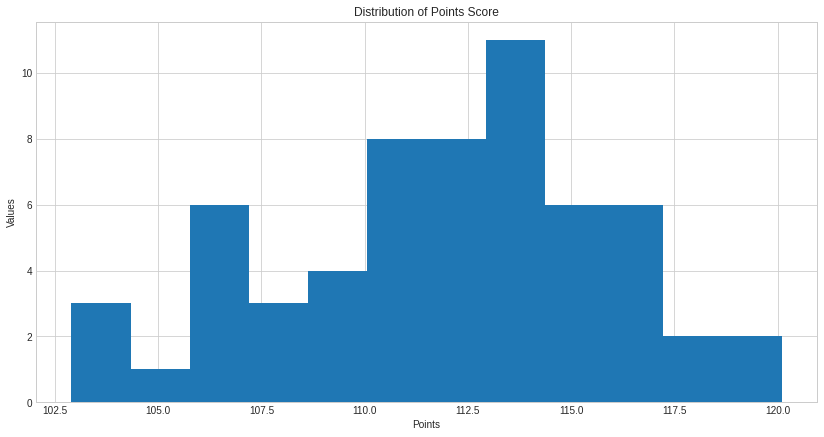

In [61]:
'''This is a histogram of the distribution of the total points scored by a team.'''

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid')
plt.hist(NBA_predictors['PTS'], bins = 12)
plt.title('Distribution of Points Score')
plt.xlabel('Points')
plt.ylabel('Values')
plt.show()

In [62]:
import statsmodels.api as sm
'''This cell compares all of the values in the dataframe and shows their correlation to total points scored. From
this model we took the 5 values with the lowest p-values to use for our final model. These valeus were the same as 
the values in the cell above being field goals made, 3 pointers made, free throws made, blocks, and assists.
'''
Win_stats = NBA_predictors.drop(['W_PCT','PTS','FG_PCT','FGA','FG3_PCT','FG3A','BLKA','REB','FT_PCT','FTA'], axis = 1)
PTS = NBA_predictors['PTS']


ols = sm.OLS(PTS, Win_stats)
results = ols.fit()
#results.params.sort_values(ascending = False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    PTS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.753e+06
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   1.81e-146
Time:                        15:03:50   Log-Likelihood:                          76.016
No. Observations:                  60   AIC:                                     -126.0
Df Residuals:                      47   BIC:                                     -98.81
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MIN           -0.0125      0.010     -1.236      0.223      -0.033       0.008
FGM            2.0036      0.010    199.001      0.000       1.983       2.024
FG3M           1.0012      0.008    127.204      0.000       0.985       1.017
FTM            1.0057      0.013     79.140      0.000       0.980       1.031
OREB           0.0075      0.013      0.575      0.568      -0.019       0.034
DREB           0.0021      0.009      0.225      0.823      -0.017       0.021
AST            0.0103      0.008      1.343      0.186      -0.005       0.026
TOV            0.0009      0.014      0.061      0.951      -0.028       0.029
STL            0.0144      0.017      0.823      0.415      -0.021       0.050
BLK            0.0257      0.019      1.377      0.175      -0.012       0.063
PF            -0.0076      0.009     -0.817      0.418      -0.026       0.011
PFD           -0.0087      0.017     -0.520      0.606      -0.042       0.025
PLUS_MINUS    -0.0026      0.004     -0.724      0.472      -0.010       0.005
==============================================================================
Omnibus:                        1.023   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.908
Skew:                           0.008   Prob(JB):                        0.635
Kurtosis:                       2.397   Cond. No.                         220.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
'''The first function uses forward selection which takes in predictors, a response variable, and a significance level.
It essentially, forward sequentially starts with a model of 1 and finds the best 1 component model. Thenit moves onto 
finding the best model with 2 components. It does this until it gets through all the predictors and will 
return the variables which lead to the most accurate model. We use sm.OLS to return p-values of each model type, and if the
'new' p-value is lower than the significane level it gets added to the model.

The backwards elimination models has a similar idea but in reverse where it starts with all of the predictors and 
eliminates predictors until it finds the best model. Still uses sm.OLS, but rather if the p-value is larger than the 
significance level, it removes that predictor from the model.

Code developed with inspiration from:
https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/
'''

def forward(predictors, response, sig =0.05):
    
    base = predictors.columns.tolist()
    best = []
    
    while (len(base)>0):
        remaining_features = list(set(base)-set(best))
        new_pval = pd.Series(index=remaining_features, dtype = 'float')
        
        for col in remaining_features:
            model = sm.OLS(response, sm.add_constant(predictors[best+[col]])).fit()
            new_pval[col] = model.pvalues[col]
            min_pval = new_pval.min()
        
        if(min_pval<sig):
            best.append(new_pval.idxmin())
        else:
            break
    return best

def backward(predictors, response, sig = 0.05):
    
    features = predictors.columns.tolist()
    
    while(len(features)>0):
        features_with_constant = sm.add_constant(predictors[features])
        p_values = sm.OLS(response, features_with_constant).fit().pvalues[1:]
        max_pval = p_values.max()
        
        if(max_pval >= sig):
            excluded = p_values.idxmax()
            features.remove(excluded)
        else:
            break
    return features


In [38]:
'''Running the forward selection and backwards elimination for the statistics given against win percentage'''
print(forward(Win_stats,PTS))
print(backward(Win_stats,PTS))
print(forward(Win_stats,PTS,.10))
print(backward(Win_stats,PTS,.10))


['FGM', 'FG3M', 'FTM']
['FGM', 'FG3M', 'FTM']
['FGM', 'FG3M', 'FTM', 'STL']
['FGM', 'FG3M', 'FTM', 'AST', 'BLK']


In [42]:
'''This cell contains the regression run again with only the 5 predictors chosen above as the predictors.'''

Points_stats = NBA_predictors[['FGM', 'FTM', 'FG3M', 'AST', 'BLK']]
#x_c = sm.add_constant(NBA_Points)
Points = NBA_predictors['PTS']

ols = sm.OLS(Points,Points_stats)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    PTS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.677e+07
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                   2.76e-174
Time:                        11:59:34   Log-Likelihood:                          72.927
No. Observations:                  60   AIC:                                     -135.9
Df Residuals:                      55   BIC:                                     -125.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FGM            1.9934      0.006    358.778      0.000       1.982       2.005
FTM            0.9931      0.006    163.299      0.000       0.981       1.005
FG3M           0.9973      0.006    160.154      0.000       0.985       1.010
AST            0.0100      0.006      1.569      0.122      -0.003       0.023
BLK            0.0318      0.016      1.989      0.052      -0.000       0.064
==============================================================================
Omnibus:                        0.315   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.493
Skew:                           0.001   Prob(JB):                        0.781
Kurtosis:                       2.556   Cond. No.                         88.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
results.params

FGM     1.993433
FTM     0.993065
FG3M    0.997256
AST     0.009997
BLK     0.031841
dtype: float64

In [63]:
'''This cell contains the a train-test split for Linear Regression'''

clf = LinearRegression()
clf.fit(X_train,y_train)
yhat = clf.predict(X_test)
mae_lr = mean_absolute_error(y_test,yhat )

display(y_test)
display(yhat)
display(mae_lr)

0     111.8
5     106.9
6     112.4
15    108.1
13    113.4
24    116.1
3     109.5
18    114.6
12    116.3
27    111.3
16    120.1
20    105.0
1     112.6
3     102.9
22    113.6
17    113.3
8     107.2
6     117.0
10    108.8
4     106.8
Name: PTS, dtype: float64

array([111.66843343, 106.76516951, 112.41049127, 107.91123685,
       113.36598535, 116.02537316, 109.35026449, 114.57904637,
       116.36274702, 111.25589854, 119.9719616 , 104.89586089,
       112.66401491, 102.78262079, 113.73160972, 113.18679912,
       107.12333499, 117.05195231, 108.83126612, 106.79599751])

0.0837049382190358

In [49]:
'''This cell contains the a train-test split for a Random Forest model'''

X_train, X_test, y_train, y_test = train_test_split(NBA_predictors[['FGM', 'FTM', 'FG3M', 'AST', 'BLK']], NBA_predictors['PTS'], test_size=0.33, random_state=42)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)


display(yhat)
display(y_test)
display(mae)

array([112.288, 109.965, 113.385, 106.159, 112.638, 115.72 , 109.63 ,
       113.209, 114.079, 110.098, 116.01 , 105.122, 114.337, 105.138,
       113.606, 112.836, 105.814, 115.345, 107.789, 107.223])

0     111.8
5     106.9
6     112.4
15    108.1
13    113.4
24    116.1
3     109.5
18    114.6
12    116.3
27    111.3
16    120.1
20    105.0
1     112.6
3     102.9
22    113.6
17    113.3
8     107.2
6     117.0
10    108.8
4     106.8
Name: PTS, dtype: float64

1.2848499999999945

**The Random Forest model yielded an error rate of 1.2848499999999945, while the Linear Regression yielded one of 0.0837049382190358. We went with the Linear Regression model for this reason.**

In [44]:
'''This function takes the dataframe, the parameters from the regression of the two teams, and the names of two teams
It then takes each team's statistics from the dataframe and uses them to predict the scores for the given game'''
def score_calc(data,p, t1, t2):
    FGM = p[0]
    FTM = p[1]
    FG3M = p[2]
    AST = p[3]
    BLK = p[4]

    
    team1 = data[data.TEAM_NAME == t1]
    team2 = data[data.TEAM_NAME == t2]
    
    t1_stats = [list(team1['FGM']),list(team1['FTM']),list(team1['FG3M']),list(team1['AST']),list(team1['BLK'])]
    t2_stats = [list(team2['FGM']),list(team2['FTM']),list(team2['FG3M']),list(team2['AST']),list(team2['BLK'])]
    
    t1_score = FGM*t1_stats[0][0]+FTM*t1_stats[1][0]+FG3M*t1_stats[2][0]+AST*t1_stats[3][0]+BLK*t2_stats[4][0]
    
    t2_score = FGM*t2_stats[0][0]+FTM*t2_stats[1][0]+FG3M*t2_stats[2][0]+AST*t2_stats[3][0]+BLK*t1_stats[4][0]
    
    print('{} score: {}'.format(t1,round(t1_score)))
    print('{} score: {}'.format(t2,round(t2_score)))
    

In [45]:
'''This is creating the simplified data frame for the 21-22 season similar to the simplified version of the predictors 
from above.'''
NBAsimp = NBA_21_22.drop(['CFPARAMS', 'CFID','TEAM_ID','GP','W','L', 'GP_RANK','W_RANK','L_RANK','W_PCT_RANK','MIN_RANK','FGM_RANK',
'FGA_RANK','FG_PCT_RANK','FG3M_RANK','FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
'DREB_RANK','REB_RANK','AST_RANK','TOV_RANK','STL_RANK','BLK_RANK','BLKA_RANK','PF_RANK','PFD_RANK','PTS_RANK',
'PLUS_MINUS_RANK'], axis = 1)


In [46]:
'''This next cell is predicting scores from Monday, December 6th.

Actual Final scores
Detroit Pistons: 103
Oklahoma City Thunder: 114

Philadelphia 76ers: 127
Charlotte Hornets: 124

'''

score_calc(NBAsimp,results.params,'Detroit Pistons','Oklahoma City Thunder')
print()
score_calc(NBAsimp,results.params,'Philadelphia 76ers','Charlotte Hornets')

Detroit Pistons score: 100
Oklahoma City Thunder score: 99

Philadelphia 76ers score: 107
Charlotte Hornets score: 116


**Model went 0/2 with this sample of predictions. Pistons/Thunder are 2 of the leagues worst teams, so variance can be expected here. 76ers have been plagued with injuries all year, and are just starting to become healthy. Model has not accounted for that yet.**

In [47]:
'''This next cell is predicting scores from Tuesday, December 7th.

Actual Final scores
Brooklyn Nets: 102
Dallas Mavericks: 99

New York Knicks: 121
San Antonio Spurs: 109

Boston Celtics: 102
Los Angeles Lakers: 117

'''

score_calc(NBAsimp,results.params,'Brooklyn Nets','Dallas Mavericks')
print()
score_calc(NBAsimp,results.params,'New York Knicks','San Antonio Spurs')
print()
score_calc(NBAsimp,results.params,'Boston Celtics','Los Angeles Lakers')


Brooklyn Nets score: 109
Dallas Mavericks score: 104

New York Knicks score: 107
San Antonio Spurs score: 108

Boston Celtics score: 109
Los Angeles Lakers score: 112


**Model had a prediction accuracy of 66% in this case! This was the second game of a back to back for the Spurs, so tired legs definitely played a factor here.**

In [57]:
'''This next cell is predicting scores from Wednesday, December 8th.

Actual Final scores
New York Knicks: 102
Indiana Pacers: 122

Dallas Mavericks: 104 
Memphis Grizzlies: 96

Utah Jazz: 136
Minnesota Timberwolves: 104

Portland Trail Blazers: 94
Golden State Warriors: 104

'''

score_calc(NBAsimp,results.params,'New York Knicks','Indiana Pacers')
print()
score_calc(NBAsimp,results.params,'Dallas Mavericks','Memphis Grizzlies')
print()
score_calc(NBAsimp,results.params,'Utah Jazz','Minnesota Timberwolves')
print()
score_calc(NBAsimp,results.params,'Portland Trail Blazers','Golden State Warriors')
print()

New York Knicks score: 107
Indiana Pacers score: 108

Dallas Mavericks score: 104
Memphis Grizzlies score: 110

Utah Jazz score: 115
Minnesota Timberwolves score: 108

Portland Trail Blazers score: 108
Golden State Warriors score: 113



**Super exciting results here! The model had a 75% prediction accuracy for winners in this sample size! In the game it was incorrect on, it still hit the Dallas Mavericks team score head on! The Grizzlies lost their best player about 2 weeks ago, and it seems like the recent team stats have not had a large enough effect for the model to be able to account for that.**